In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, FloatSlider, IntSlider

# ---------------------------
# Cournot Equilibrium (n symmetric firms)


def cournot_equilibrium_sym(alpha_d, beta_d, c, n):
    if n < 1:
        print("n must be >= 1")
        return
    
    # Equilibrium output per firm
    q_star = (alpha_d - beta_d * c) / (n + 1)


    # Total quantity

    Q_total = n * q_star


    # Market price
    p = (alpha_d - Q_total) / beta_d


    # Profit per firm

    profit = q_star * p - c * q_star

    return q_star, Q_total, p, profit

def update_cournot(alpha_d, beta_d, c, n):
    q_star, Q_total, p, profit = cournot_equilibrium_sym(alpha_d, beta_d, c, n)
    # dataFrame for values
    data = {
        'Equilibrium Output per Firm': [q_star],
        'Total Output': [Q_total],
        'Market Price': [p],
        'Profit per Firm': [profit]
    }
    df = pd.DataFrame(data)
    print("Cournot Equilibrium (n symmetric firms):")
    print(df)
    
    # one bar per firm same
    firms = [f'Firm {i+1}' for i in range(n)]
    quantities = [q_star]*n
    profits = [profit]*n
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    # Bar chart for quantities
    ax[0].bar(firms, quantities, color='skyblue')
    ax[0].set_title("Equilibrium Quantities per Firm (Cournot)")
    ax[0].set_ylabel("Quantity")
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].set_ylim(0, 60)  # Fixed y-axis for quantities
    
    # Bar chart for profits
    ax[1].bar(firms, profits, color='lightgreen')
    ax[1].set_title("Equilibrium Profits per Firm (Cournot)")
    ax[1].set_ylabel("Profit")
    ax[1].tick_params(axis='x', rotation=45)
    ax[1].set_ylim(0, 5000)  # Fixed y-axis for profits
    
    plt.tight_layout()
    plt.show()

# ---------------------------
# Stackelberg Equilibrium (1 Leader, n-1 Followers)


def stackelberg_equilibrium_sym(alpha_d, beta_d, c, n):
    if n < 2:
        print("For Stackelberg, n must be at least 2 (1 leader, at least 1 follower).")
        return None
    # Leader's equilibrium output
    q_leader = (alpha_d - beta_d * c) / 2


    # Each followers equilibrium output fro best respinse
    
    q_follower = (alpha_d - q_leader - beta_d * c) / (2 * (n - 1))
    # Total follower output

    Q_followers = (n - 1) * q_follower

    # Total market outpu
    Q_total = q_leader + Q_followers


    # Market pice
    p = (alpha_d - Q_total) / beta_d

    # Leader profit
    profit_leader = q_leader * p - c * q_leader

    # Follower profit
    profit_follower = q_follower * p - c * q_follower

    return q_leader, q_follower, Q_total, p, profit_leader, profit_follower

def update_stackelberg(alpha_d, beta_d, c, n):
    if n < 2:
        print("For Stackelberg, we need n to be bigger than 2 (1 leader, at least 1 follower).")
        return
    

    result = stackelberg_equilibrium_sym(alpha_d, beta_d, c, n)
    if result is None:
        return
    


    q_leader, q_follower, Q_total, p, profit_leader, profit_follower = result
    
    # dataFrame to display eqil
    data = {
        'Leader Quantity': [q_leader],
        'Follower Quantity per Firm': [q_follower],
        'Total Follower Quantity': [q_follower * (n - 1)],
        'Total Output': [Q_total],
        'Market Price': [p],
        'Leader Profit': [profit_leader],
        'Follower Profit per Firm': [profit_follower]
    }

    df = pd.DataFrame(data)

    print("Stackelberg Equilibrium (1 Leader, n-1 Followers):")
    print(df)
    
  
    labels = ['Leader'] + [f'Follower {i+1}' for i in range(n-1)]
    quantities = [q_leader] + [q_follower]*(n-1)
    profits = [profit_leader] + [profit_follower]*(n-1)
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart for quantities
    ax[0].bar(labels, quantities, color=['salmon'] + ['orange']*(n-1))
    ax[0].set_title("Equilibrium Quantities (Stackelberg)")
    ax[0].set_ylabel("Quantity")
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].set_ylim(0, 60)  # Fixed y-axis for quantities
    
    # Bar chart for profits
    ax[1].bar(labels, profits, color=['violet'] + ['plum']*(n-1))
    ax[1].set_title("Equilibrium Profits (Stackelberg)")
    ax[1].set_ylabel("Profit")
    ax[1].tick_params(axis='x', rotation=45)
    ax[1].set_ylim(0, 2500)  # Fixed y-axis for profits
    
    plt.tight_layout()
    plt.show()


# ---------------------------
# Interactive Widgets

print("Cournot Model (n symmetric firms):")
interact(update_cournot,
         alpha_d=FloatSlider(value=100, min=50, max=200, step=5, description='α_d'),
         beta_d=FloatSlider(value=0.5, min=0.1, max=1.0, step=0.1, description='β_d'),
         c=FloatSlider(value=10, min=0, max=50, step=1, description='Cost c'),
         n=IntSlider(value=3, min=1, max=20, step=1, description='n'));

print("\nStackelberg Model (1 Leader, n-1 Followers):")
interact(update_stackelberg,
         alpha_d=FloatSlider(value=100, min=50, max=200, step=5, description='α_d'),
         beta_d=FloatSlider(value=0.5, min=0.1, max=1.0, step=0.1, description='β_d'),
         c=FloatSlider(value=10, min=0, max=50, step=1, description='Cost c'),
         n=IntSlider(value=3, min=2, max=20, step=1, description='n'));


Cournot Model (n symmetric firms):


interactive(children=(FloatSlider(value=100.0, description='α_d', max=200.0, min=50.0, step=5.0), FloatSlider(…


Stackelberg Model (1 Leader, n-1 Followers):


interactive(children=(FloatSlider(value=100.0, description='α_d', max=200.0, min=50.0, step=5.0), FloatSlider(…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, FloatSlider, IntSlider




# ---------------------------
# Cournot Equilibrium (n symmetric Firms)

def cournot_equilibrium_sym(alpha_d, beta_d, c, n):
    if n < 1:
        print("n must be >= 1")
        return
    

    # Equilibrium output per Firm
    q_star = (alpha_d - beta_d * c) / (n + 1)

    # Total market output
    Q_total = n * q_star

    # Market pric
    p = (alpha_d - Q_total) / beta_d


    
    # Profit per firm
    profit = q_star * p - c * q_star
    return q_star, Q_total, p, profit




# Ai conversion of derivation into an interactive graph

def update_cournot(alpha_d, beta_d, c, n):
    q_star, Q_total, p, profit = cournot_equilibrium_sym(alpha_d, beta_d, c, n)
    # Create DataFrame for key values
    data = {
        'Equilibrium Output per Firm': [q_star],
        'Total Output (Market)': [Q_total],
        'Market Price': [p],
        'Profit per Firm': [profit]
    }
    df = pd.DataFrame(data)
    print("Cournot Equilibrium (n symmetric Firms):")
    print(df)
    
    # now prepare data for plotting one bar per Firm
    Firms = [f'Firm {i+1}' for i in range(n)]
    quantities = [q_star]*n
    profits = [profit]*n
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    # Bar chart for equilibrium quantities per Firm
    ax[0].bar(Firms, quantities, color='skyblue')
    ax[0].set_title("Equilibrium Quantities per Firm (Cournot)")
    ax[0].set_ylabel("Quantity")
    ax[0].tick_params(axis='x', rotation=45)
    
    # Bar chart for equilibrium profits per Firm
    ax[1].bar(Firms, profits, color='lightgreen')
    ax[1].set_title("Equilibrium Profits per Firm (Cournot)")
    ax[1].set_ylabel("Profit")
    ax[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# End Ai Generation




# ---------------------------
# Stackelberg Equilibrium (1 Leader, n-1 Followers among Firms)

def stackelberg_equilibrium_sym(alpha_d, beta_d, c, n):
    if n < 2:
        print("For Stackelberg, n must be at least 2 (1 leader and at least 1 follower).")
        return None
    


    # Leader's equilibrium output (Firm 1)
    q_leader = (alpha_d - beta_d * c) / 2


    # Each follower's equilibrium output (Firms 2 to n)

    q_follower = (alpha_d - q_leader - beta_d * c) / (2 * (n - 1))
    
    
    # Total output from followers
    Q_followers = (n - 1) * q_follower

    # Total market output
    Q_total = q_leader + Q_followers

    # Market price
    p = (alpha_d - Q_total) / beta_d



    # Profits
    profit_leader = q_leader * p - c * q_leader

    profit_follower = q_follower * p - c * q_follower
    return q_leader, q_follower, Q_total, p, profit_leader, profit_follower



# Ai conversion of derivation into an interactive graph


def update_stackelberg(alpha_d, beta_d, c, n):
    if n < 2:
        print("For Stackelberg, n must be at least 2 (1 leader and at least 1 follower).")
        return
    

    result = stackelberg_equilibrium_sym(alpha_d, beta_d, c, n)

    if result is None:
        return
    q_leader, q_follower, Q_total, p, profit_leader, profit_follower = result
    
    # DataFrme 
    data = {
        'Leader Output (Firm 1)': [q_leader],
        'Follower Output per Firm (Firms 2 to n)': [q_follower],
        'Total Follower Output': [q_follower * (n - 1)],
        'Total Output (Market)': [Q_total],
        'Market Price': [p],
        'Leader Profit': [profit_leader],
        'Follower Profit per Firm': [profit_follower]
    }
    df = pd.DataFrame(data)
    print("Stackelberg Equilibrium (1 Leader, n-1 Followers among Firms):")
    print(df)
    
    # Prepare labels for plotting
    labels = ['Leader (Firm 1)'] + [f'Follower {i+1}' for i in range(1, n)]
    quantities = [q_leader] + [q_follower]*(n-1)
    profits = [profit_leader] + [profit_follower]*(n-1)
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart for equilibrium quantities
    ax[0].bar(labels, quantities, color=['salmon'] + ['orange']*(n-1))
    ax[0].set_title("Equilibrium Quantities (Stackelberg)")
    ax[0].set_ylabel("Quantity")
    ax[0].tick_params(axis='x', rotation=45)
    
    # Bar chart for equilibrium profits
    ax[1].bar(labels, profits, color=['violet'] + ['plum']*(n-1))
    ax[1].set_title("Equilibrium Profits (Stackelberg)")
    ax[1].set_ylabel("Profit")
    ax[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()





# Ai Generation
# ---------------------------
# Interactive Widgets for Both Models

print("Cournot Model (n symmetric Firms):")
interact(update_cournot,
         alpha_d=FloatSlider(value=100, min=50, max=200, step=5, description='α_d'),
         beta_d=FloatSlider(value=0.5, min=0.1, max=1.0, step=0.1, description='β_d'),
         c=FloatSlider(value=10, min=0, max=50, step=1, description='Cost c'),
         n=IntSlider(value=3, min=1, max=20, step=1, description='n'));

print("\nStackelberg Model (1 Leader, n-1 Followers among Firms):")
interact(update_stackelberg,
         alpha_d=FloatSlider(value=100, min=50, max=200, step=5, description='α_d'),
         beta_d=FloatSlider(value=0.5, min=0.1, max=1.0, step=0.1, description='β_d'),
         c=FloatSlider(value=10, min=0, max=50, step=1, description='Cost c'),
         n=IntSlider(value=3, min=2, max=20, step=1, description='n'))


# End Ai Generation



Cournot Model (n symmetric Firms):


interactive(children=(FloatSlider(value=100.0, description='α_d', max=200.0, min=50.0, step=5.0), FloatSlider(…


Stackelberg Model (1 Leader, n-1 Followers among Firms):


interactive(children=(FloatSlider(value=100.0, description='α_d', max=200.0, min=50.0, step=5.0), FloatSlider(…

<function __main__.update_stackelberg(alpha_d, beta_d, c, n)>

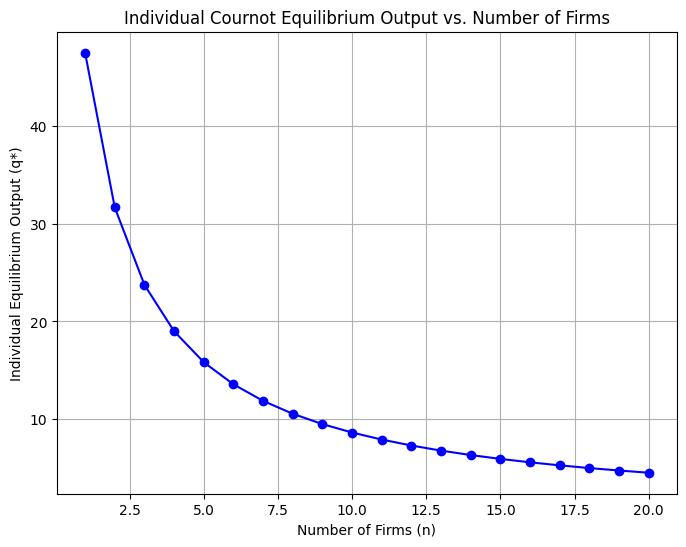

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
# Demand intercept
alpha_d = 100     
# Slope of the invrse demand function
beta_d = 0.5       
# Marginal cost per frm
c = 10            

# Range of firms (n)
n_values = np.arange(1, 21)  # For n from 1 to 20

# Individual output per firm in symmetric Cournot:
# q_star = (alpha_d - beta_d * c) / (n + 1)
q_star_values = (alpha_d - beta_d * c) / (n_values + 1)

plt.figure(figsize=(8, 6))
plt.plot(n_values, q_star_values, marker='o', linestyle='-', color='blue')
plt.title("Individual Cournot Equilibrium Output vs. Number of Firms")
plt.xlabel("Number of Firms (n)")
plt.ylabel("Individual Equilibrium Output (q*)")
plt.grid(True)
plt.show()